In [1]:
import pandas as pd
import numpy as np
import operator

# Project Update 2 
by Jacob Paul and Jack Sandberg

### Setup (same from last update)

The code below was used to get our basic data extracted and structured in a way that is useful for our analysis. We will be using many of these structures in this update

In [ ]:
df = pd.read_csv("Trees_Public.csv")
df.head()

In [203]:
#df.columns

In [4]:
def dic(c):
    d = {}
    for i in c:
        try:
            d[i]+=1
        except:
            d[i]=1
    import operator
    d = sorted(d.items(), key=operator.itemgetter(1),reverse = True)
    return d
def dic2(c):
    a = {}
    for i in c:
        try:
            a[i]+=1
        except:
            a[i]=1
    import operator
    a = sorted(a.items(), key=operator.itemgetter(1),reverse = True)
    t=0
    for i in a:
        t+=i[1]
    d = []
    for i in a:
        d.append([i[0],float(i[1])/t])
    return d
def dic3(c):
    d={}
    for i in c:
        try:
            d[df[df['STREET']==i[0]]['HOOD'].iloc[0]]+=i[1]
        except:
            d[df[df['STREET']==i[0]]['HOOD'].iloc[0]]=i[1]
    for i in df['HOOD']:
        try:
            d[i]
        except:
            if i == i:
                d[i]=0
    d = sorted(d.items(), key=operator.itemgetter(1),reverse = True)
    return d

In [5]:
ash = df[df['COMMONNAME']=='Green Ash'].append(df[df['COMMONNAME']=='White Ash']) #Subset of tree dataset that only has ash trees
mt_dic = dic(ash['MT'])  #dictionary of sorted values of Maintenance columns
strs = df['STREET'].append(df['TOSTR']).append(df['FROMSTR']).append(df['ONSTR']).unique()

strs_tree_counts={}
for i in df['STREET'].unique():
    e={}
    for j in df[df['STREET']==i]['COMMONNAME']:
        #e['Ash']=0
        if j !="White Ash" and j!="Green Ash":
            try:
                e[j]+=1
            except:
                e[j]=1
        else:
            try:
                e['Ash']+=1
            except:
                e['Ash']=1
    strs_tree_counts[i]=[np.sum([values for key,values in e.items()]),e]
for key,value in strs_tree_counts.items():
    for a,b in value[1].items():
        strs_tree_counts[key][1][a] = [b,float(b)/value[0]]

bad_ash = ash[ash['MT']!='No Specific Maintenance Need']
good_ash = ash[ash['MT']=='No Specific Maintenance Need']

boulder_trees = dic(df['COMMONNAME'])

bad_ash_strs =  [i for i in bad_ash['STREET'].unique()]
bad_ash_strs_counts = sorted([[i,len(bad_ash[bad_ash['STREET'] ==i])] for i in bad_ash_strs], key = lambda num:num[1], reverse = True)
good_ash_strs = [i for i in good_ash['STREET'].unique()]
only_good_ash_strs = [i for i in good_ash['STREET'].unique() if i not in bad_ash_strs]
only_bad_ash_strs = [i for i in bad_ash['STREET'].unique() if i not in good_ash_strs]
both_ash_strs = [i for i in good_ash['STREET'].unique() if i in bad_ash['STREET'].unique()]
both_ash_strs_percent = len(both_ash_strs)/len(strs)

bad_strs_percent = len(bad_ash_strs)/len(strs)
good_strs_percent = len(good_ash_strs)/len(strs)

bad_ash_tofro_strs = bad_ash['TOSTR'].append(bad_ash['FROMSTR']).unique()


at_risk_strs = [i for i in only_good_ash_strs if i in bad_ash_tofro_strs]

at_risk_strs_counts = []
for i in at_risk_strs:
    at_risk_strs_counts.append([i,len(ash[ash['STREET']==i])])
    
at_risk_strs_sorted = sorted(at_risk_strs_counts, key=lambda num:num[1], reverse = True)

at_risk_strs_d = {}
for i in at_risk_strs_sorted:
    at_risk_strs_d[i[0]]=i[1]
    
at_risk_strs_ash_dic = {}
for i in at_risk_strs_sorted:
    at_risk_strs_ash_dic[i[0]]=strs_tree_counts[i[0]][1]['Ash']
    
at_risk_hoods=dic3(at_risk_strs_sorted)
bad_ash_hoods_counts = dic3(bad_ash_strs_counts)


strs_trees_percent_dic = {}
for i in df['COMMONNAME'].unique():
    strs_trees_percent_dic[i]=np.mean([value[1][i][1] for key,value in strs_tree_counts.items() if i in value[1]])
t=[value[1]['Ash'][1] for key,value in strs_tree_counts.items() if 'Ash'in value[1]]
strs_trees_percent_dic['Ash']=np.mean(t)
strs_trees_percent_dic_sorted = sorted(strs_trees_percent_dic.items(), key=operator.itemgetter(1),reverse = True)

strs_trees_percent_dic_2 = {}
for i in df['COMMONNAME'].unique():
    t = []
    for key,value in strs_tree_counts.items():
        if i in value[1]:
            t.append(np.mean(value[1][i][1]))
        else:
            t.append(0)
    strs_trees_percent_dic_2[i]=np.mean(t)
t=[]
for key,value in strs_tree_counts.items():
    if 'Ash' in value[1]:
        t.append(value[1]['Ash'][1])
    else:
        t.append(0)
strs_trees_percent_dic_2['Ash']=np.mean(t)
strs_trees_percent_dic_sorted_2 = sorted(strs_trees_percent_dic_2.items(), key=operator.itemgetter(1),reverse = True)

/Users/jacobpaul/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jacobpaul/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
help_vars = {'ash': 'filtered Data frame that only includes ash trees',
'mt_dic': 'sorted list of maintenance values for ash trees',
'boulder_trees': 'quantities of each tree in boulder',
'strs': 'list of all streets in boulder',

'bad_ash': 'data frame of all ash trees that need maintenance',
'bad_ash_strs': 'list of streets that have ash trees that need maintenance',
'only_bad_ash_strs': 'list of streets that have ash trees and all of those trees need maintenance',
'bad_ash_strs_counts': 'sorted list of streets and the amounts of bad ash trees they have',
'bad_strs_percent': 'percent of streets in Boulder that have bad trees',
'bad_ash_tofro_strs': 'list of streets that have another street touching it that have bad ash trees on it',
'bad_ash_hoods_counts': 'sorted list of hoods and the amount of bad ash trees that it has',

'good_ash': 'data frame of all ash trees that dont need maintenance',
'good_ash_strs': 'list of all streets that have good ash trees on it',
'only_good_ash_strs': 'list of streets that have ash trees and none of those trees need maintenance',
'good_strs_percent': 'percent of streets in Boulder that have good ash trees',

'both_ash_strs': 'list of streets that have some ash trees that need maintenance and some that dont',
'both_ash_strs_percent': 'percent of streets in boulder that have both good & bad ash trees',

'at_risk_strs': 'streets that have an ajoining street that has a tree that needs maintenance',
'at_risk_strs_d': 'alphabetized dictionary of streets that have no bad trees and the amount of bad trees on ajoining streets',
'at_risk_strs_sorted': 'list of streets that have no bad trees, sorted by how many bad trees are on ajoining streets',
'at_risk_strs_ash_dic': 'dictionary of streets that have neighboring streets with bad ash trees, and the amount of ash trees and the percentage of ash tree makeup of that street',
'at_risk_hoods': 'list of hoods, sorted by the amount of at risk streets they have',

'strs_trees_percent_dic': 'alphabetized dictionary of each tree, and the average percentage that the tree makes up for streets that have that tree',
'strs_trees_percent_dic_sorted': 'list of each tree, sorted by the average percentage that the tree makes up for streets that have that tree',

'strs_trees_percent_dic_2': 'alphabetized dictionary of each tree, and the average percentage of trees that that tree makes up for every street',
'strs_trees_percent_dic_sorted_2': 'list of each tree, sorted by average percentage of trees that that tree makes up for every street',

'strs_tree_counts': 'Dictionary of each street. values are counts of trees on that street, and another dictionary that has each type of tree on that street, and the count of that tree and the percentage makeup of that tree on that street'}

In [ ]:
ash_weighted_streets_trees = {}
for i in ash_weighted_streets:
    if strs_tree_counts[i[0]][1]['Ash'][1]>.08: #### grab all streets that have ash percentages of over .08
        
        #ash_weighted_streets_trees[i[0]]=[i[1],sorted(strs_tree_counts[i[0]][1].items(),key=operator.itemgetter(1),reverse=True)[:10]]
        ash_weighted_streets_trees[i[0]]=i[1],strs_tree_counts[i[0]][1]
ash_weighted_streets_trees #this is a dictionary that has the grabbed streets, weighted value calculated above, and top 10 tree percentages on that street

# Calculating Diversity

Areas with high percentages of ash trees and low amounts of diversity are at the biggest risk of impact from EAB. In the event that treatments for EAB do not work, these trees will likely need to be replaced. This could be seen as an opportunity to increase tree diversity on streets impacted by EAB. From a statistical point of view, what should we replace these trees with?

To find this, we need to identify the streets with the *least* diversity and with the highest composition of ash trees. To measure "diversity" we used the variance of the percent makeup of various trees on a given street.

In [205]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
#Creating a dataset with the "diversity" calculation
diversity = []
for street in ash_weighted_streets_trees:
    percents = [ash_weighted_streets_trees[street][1][i][1] for i in ash_weighted_streets_trees[street][1]]
    diversity.append([street,ash_weighted_streets_trees[street][0],ash_weighted_streets_trees[street][1]["Ash"][1],np.std(percents)])
    #creating dataset with street, number of trees, percent of ash trees, std deviation of percentage of trees

The distribution of this diversity figure follows a mostly normal distribution, which means that we'll be looking at the outliers.

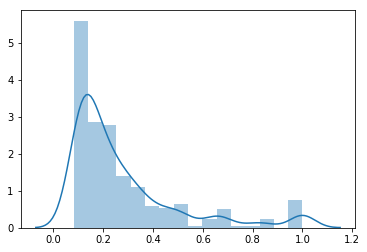

In [150]:
sb.distplot([i[2] for i in diversity])

In [164]:
#Create diversity dataframe
diversity_df = pd.DataFrame(diversity, columns=['street','num_trees','percent_ash_trees','std_dev_of_tree_makeup'])

In [174]:
#sort the dataframe and sort to get the "least diverse" streets
least_diverse_high_ash = diversity_df[diversity_df['num_trees'] > 20][:100].sort_values(['std_dev_of_tree_makeup','num_trees'], ascending=False)

In [177]:
least_diverse_high_ash

,street,num_trees,percent_ash_trees,std_dev_of_tree_makeup
36,WHITE PL,35.0,0.795455,0.281325
55,FLATIRON PY,26.0,0.634146,0.224814
66,LODGE CT,21.0,0.636364,0.221523
22,CENTRAL AV,49.0,0.510417,0.136041
2,LINDEN PARK DR,149.0,0.639485,0.133155
67,LODGE LN,21.0,0.344262,0.103780
50,GREENBRIAR BV,27.0,0.281250,0.103665
56,ROXWOOD LN,26.0,0.114537,0.091489
37,26TH ST,34.0,0.151111,0.079239
68,RESERVOIR RD,21.0,0.084677,0.075894


By plotting the percent of ash trees against the variation (higher variation means less diversity), we should focus on the right side of the chart. These streets have high percentage of ash trees and low diversity. 

Text(0.5, 6.79999999999999, 'Percent of Ash Trees')

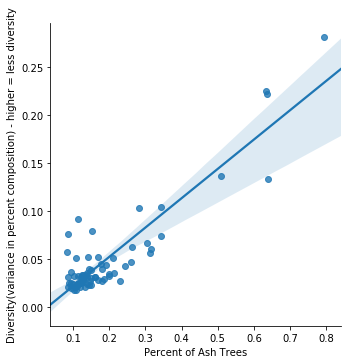

In [208]:
sb.lmplot(data=least_diverse_high_ash, x = "percent_ash_trees", y = "std_dev_of_tree_makeup")
plt.ylabel("Diversity(variance in percent composition) - higher = less diversity")
plt.xlabel("Percent of Ash Trees")

In [179]:
strs_trees_percent_dic_3 = {}
for i in df['COMMONNAME'].unique():
    t = []
    for key,value in strs_tree_counts.items():
        if key == "Ash":
            continue
        if i in value[1]:
            t.append(np.mean(value[1][i][1]))
        else:
            t.append(0)
    strs_trees_percent_dic_3[i]=np.mean(t)

In [184]:
sum(strs_trees_percent_dic_3.values())

0.8671042035780248

In [185]:
len(ash)

5709

## Preview for the next update

In the next update, we want to tackle the question: if all Ash trees on a street die, what trees should replace them? Below is a preliminary approach at caclulating what trees should replace the ash trees. In this case, we use the "standard street" - the average percent composition of tree species across all streets in Boulder, excluding ash. By multiplying these percentages by the amount of Ash trees on a street, we can get a rough idea of what trees and how many of them should replace the ash trees.

In [201]:
linden_replacements = {}
num_ash = ash_weighted_streets_trees["LINDEN PARK DR"][1]["Ash"][0]
for key,value in ash_weighted_streets_trees["LINDEN PARK DR"][1].items():
    if key != "Ash":
        linden_replacements[key] = num_ash*value[1]

In [202]:
linden_replacements

{'Native Cottonwood': 4.476394849785407,
 'Quaking Aspen': 2.5579399141630903,
 'Flowering Plum': 1.2789699570815452,
 'Siberian Elm': 5.115879828326181,
 'Willow species': 2.5579399141630903,
 'Rocky Mountain Juniper': 2.5579399141630903,
 'Common Honeylocust': 1.2789699570815452,
 'Pinon Pine': 2.5579399141630903,
 'Austrian Pine': 4.476394849785407,
 'Blue Spruce': 1.2789699570815452,
 'Ponderosa Pine': 3.1974248927038627,
 'Lanceleaf Cottonwood': 2.5579399141630903,
 'Crack Willow': 4.476394849785407,
 'Plum species': 0.6394849785407726,
 'Plains Cottonwood': 10.231759656652361,
 'Silver Maple': 1.9184549356223175,
 nan: 0.6394849785407726,
 'Flowering Crabapple': 0.6394849785407726,
 'Limber Pine': 0.6394849785407726,
 'Swamp White Oak': 0.6394849785407726}